<a href="https://colab.research.google.com/github/ashtonsouthwick/DSPS_ASouthwick/blob/main/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import os
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import itertools
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
# this mounts your google drive
drive.mount("/content/gdrive")
# this gets you to your drive folder
%cd gdrive/My\ Drive/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [3]:
# this makes sure the file is there: this cell should return "kaggle.json"
!ls kaggle.json
# this limits who can view and make changes who can access this file.
!chmod 600 kaggle.json

kaggle.json


In [4]:
# this reads in the file and stores it into the system variables of your colab sessions which allows you to connect programmatically to the kaggle platform
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

Task 2: read in the data for the World Happniess Dataset e.g. https://www.kaggle.com/datasets/unsdsn/world-happiness/data - use the 2024 data (there are several in the kaggle database, see below)

In [5]:
!kaggle datasets list -s '2024'
!kaggle datasets download -h

ref                                                   title                                             size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------  ------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
patrickb1912/ipl-complete-dataset-20082020            IPL Complete Dataset (2008-2024)               1910090  2024-06-08 07:13:12.087000         128849       1010  1.0              
rohanrao/formula-1-world-championship-1950-2020       Formula 1 World Championship (1950 - 2024)     6585538  2025-01-29 04:43:07.267000         137822       2142  1.0              
jakubkhalponiak/phones-2024                           Phones 2024                                    1385178  2024-10-28 16:48:42.263000           4093         54  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024     Most Streamed Spotify Songs 2024    

In [6]:
!kaggle datasets download -d jainaru/world-happiness-report-2024-yearly-updated

Dataset URL: https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated
License(s): CC0-1.0
world-happiness-report-2024-yearly-updated.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# !unzip world-happiness-report-2024-yearly-updated.zip

In [8]:
!pwd

/content/gdrive/My Drive


In [9]:
!ls

'403 HW1.pdf'
'403 Hw2.pdf'
'Alexandra Hoeler, Molly Dineen, Kelly Foster, Ashton Southwick.gdoc'
'Altruism Project.gdoc'
'Annotated Bibliography.gdoc'
 AshtonSouthwickResume.pdf
'Association Tests.gdoc'
'BeamJobs Job Tracker .gsheet'
'CamScanner 09-14-2022 14.48.gdoc'
'CamScanner 09-14-2022 14.48.pdf'
'chem notes.gdoc'
'Colab Notebooks'
'Copy of F22 MATH241 Semester Grade Template for students.gsheet'
'Copy of GRE requirements & admissions fees for US Canadian Astronomy & Physics Programs.gsheet'
'Copy of Lab Week10 AirResistance-LabReport-Template .gdoc'
'Copy of Lab Week 6 springs - Blank.gdoc'
'Copy of Research Worksheet - Burke Spring 2023.gdoc'
'Copy of W2-30-LabPrep-VPython.gdoc'
'Copy of Week 11 - Runtime Analysis.gdoc'
'Copy of Week 2 - Fussing with Functions Worksheet.gdoc'
'Copy of Week 4 - Complex Abstractions Worksheet.gdoc'
'Copy of Week 6 - Placing Patterns.gdoc'
'Copy of Week 7 - Designing Worlds.gdoc'
'Digital Minimalism Summary and Response.gdoc'
'Discussing Bias.gdoc

In [10]:
df = pd.read_csv("World-happiness-report-2024.csv", encoding="ISO-8859-1")
# was getting error reading this in, I asked chatGPT what the reason was and how to fix and it added the encoding parameter

make sure the specific file has a dystopian residuals column and a happiness score and uncertainties columns otherwise you won't be able to do all tasks - they may have slightly different names tho as discussed above


In [11]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [12]:
df[['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker', 'Dystopia + residual']]

,Country name,Ladder score,upperwhisker,lowerwhisker,Dystopia + residual
0,Finland,7.741,7.815,7.667,2.082
1,Denmark,7.583,7.665,7.500,1.881
2,Iceland,7.525,7.618,7.433,2.050
3,Sweden,7.344,7.422,7.267,1.658
4,Israel,7.341,7.405,7.277,2.298
...,...,...,...,...,...
138,Congo (Kinshasa),3.295,3.462,3.128,1.102
139,Sierra Leone,3.245,3.366,3.124,1.068
140,Lesotho,3.186,3.469,2.904,0.875
141,Lebanon,2.707,2.797,2.616,-0.073


Task 3: For each numerical column X, prepare a column that is a minmax version of X and a version that is the standardized version of X, store them in the same or another dataframe (your choice) as, for example X_minmax and X_standardized (choose the variable or dataframe names you want, but make them meaningful and descriptive!)

In [13]:
numerical = df.select_dtypes(include='number').columns
minmax = MinMaxScaler()
standard = StandardScaler()
df_scaled = pd.DataFrame()
for col in numerical:
  df_scaled[f'{col}_minmax'] = minmax.fit_transform(df[[col]]).ravel()
  df_scaled[f'{col}_standard'] = standard.fit_transform(df[[col]]).ravel()
df_scaled = pd.concat([df, df_scaled], axis=1)
df_scaled

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,Healthy life expectancy_minmax,Healthy life expectancy_standard,Freedom to make life choices_minmax,Freedom to make life choices_standard,Generosity_minmax,Generosity_standard,Perceptions of corruption_minmax,Perceptions of corruption_standard,Dystopia + residual_minmax,Dystopia + residual_standard
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,...,0.810968,1.059525,0.995365,1.472287,0.354115,-0.058370,0.949565,3.115426,0.701726,0.945009
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,...,0.815636,1.083865,0.953650,1.249941,0.508728,0.788873,0.953043,3.131326,0.636275,0.569683
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,...,0.837806,1.199485,0.949015,1.225236,0.643392,1.526794,0.316522,0.221634,0.691306,0.885255
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,...,0.844807,1.235996,0.971031,1.342585,0.551122,1.021182,0.911304,2.940526,0.563660,0.153278
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,...,0.863477,1.333360,0.742758,0.125863,0.381546,0.091947,0.335652,0.309084,0.772061,1.348343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,...,0.305718,-1.575378,0.548088,-0.911747,0.471322,0.583895,0.125217,-0.652863,0.382612,-0.884935
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,...,0.295216,-1.630145,0.543453,-0.936452,0.451372,0.474573,0.092174,-0.803913,0.371540,-0.948423
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,...,0.000000,-3.169707,0.606025,-0.602935,0.204489,-0.878283,0.147826,-0.549514,0.308694,-1.308810
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,...,0.648775,0.213678,0.200463,-2.764624,0.169576,-1.069595,0.050435,-0.994713,0.000000,-3.079000


Task 4: For each numerical column pair X and Y make a scatter plot of Y vs X with the data as is read in, a scatter plot of Y_minmax vs X_minmax, and a scatter plot of Y_standardized and X_standardized

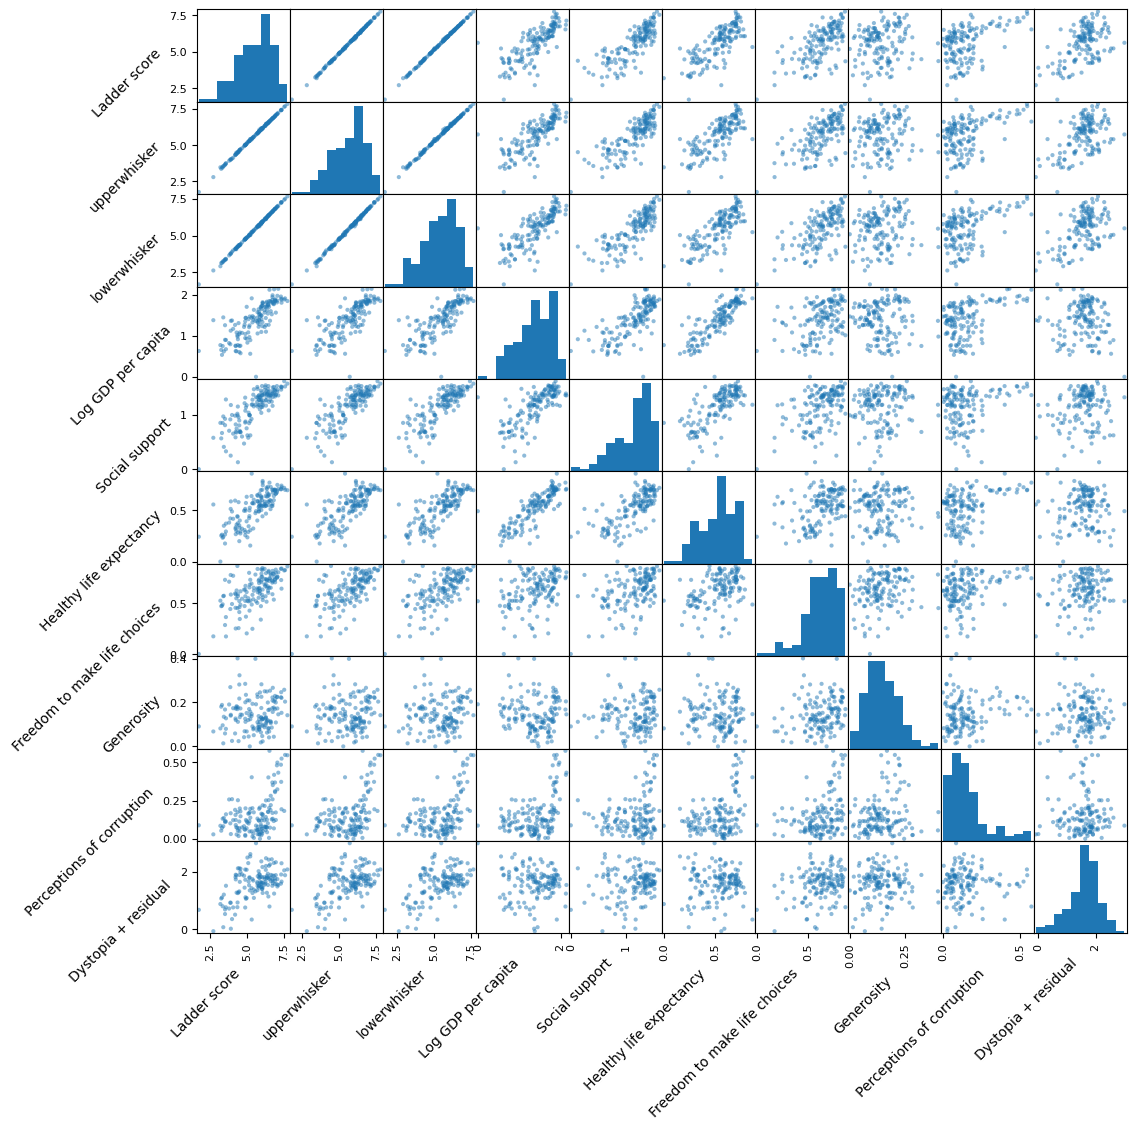

In [14]:
scatterplot = pd.plotting.scatter_matrix(df[numerical], figsize=(12,12))
for ax in scatterplot.ravel():
  ax.xaxis.label.set_rotation(45)
  ax.yaxis.label.set_rotation(45)

  ax.xaxis.label.set_ha('right')
  ax.yaxis.label.set_ha('right')
plt.show()

Figure 1: Scattered matrix of 2024 Happiness report. This helps provide insight for correlations of different factors that can affect happiness in countries. Many of these trends seem to show positive correlations.

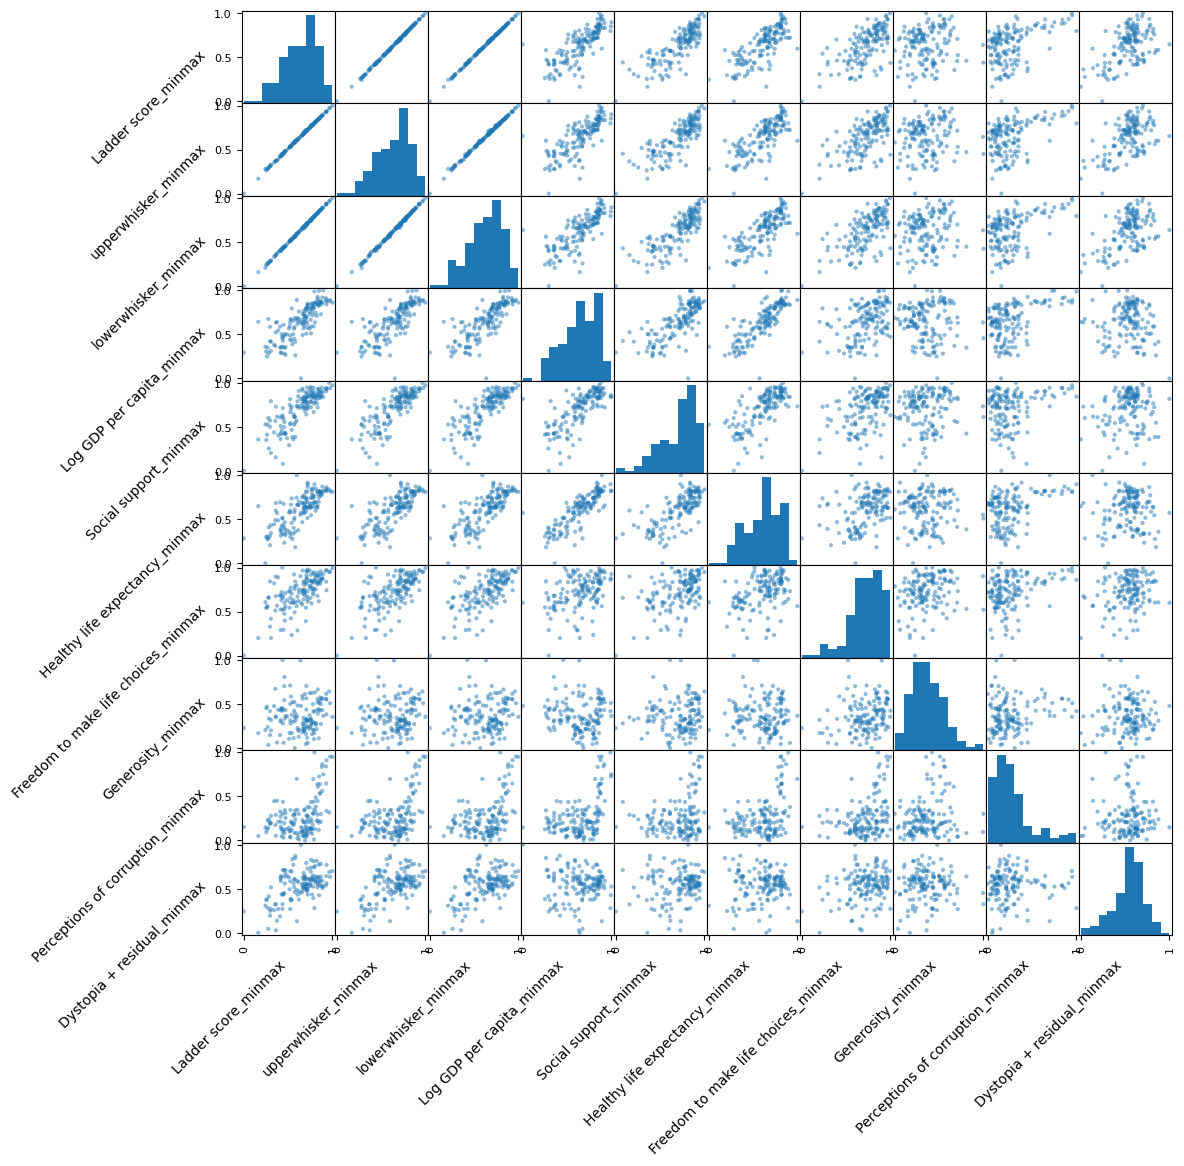

In [15]:
minmax_cols = df_scaled.filter(like="_minmax").columns
scatterplot_minmax = pd.plotting.scatter_matrix(df_scaled[minmax_cols], figsize=(12,12))
for ax in scatterplot_minmax.ravel():
  ax.xaxis.label.set_rotation(45)
  ax.yaxis.label.set_rotation(45)

  ax.xaxis.label.set_ha('right')
  ax.yaxis.label.set_ha('right')
plt.show()

Figure 2: The same figure as figure 1, just using minmax scaling, so that all the values are normalized from 0 to 1. We can see that the plots are all identical other than the numerical values.

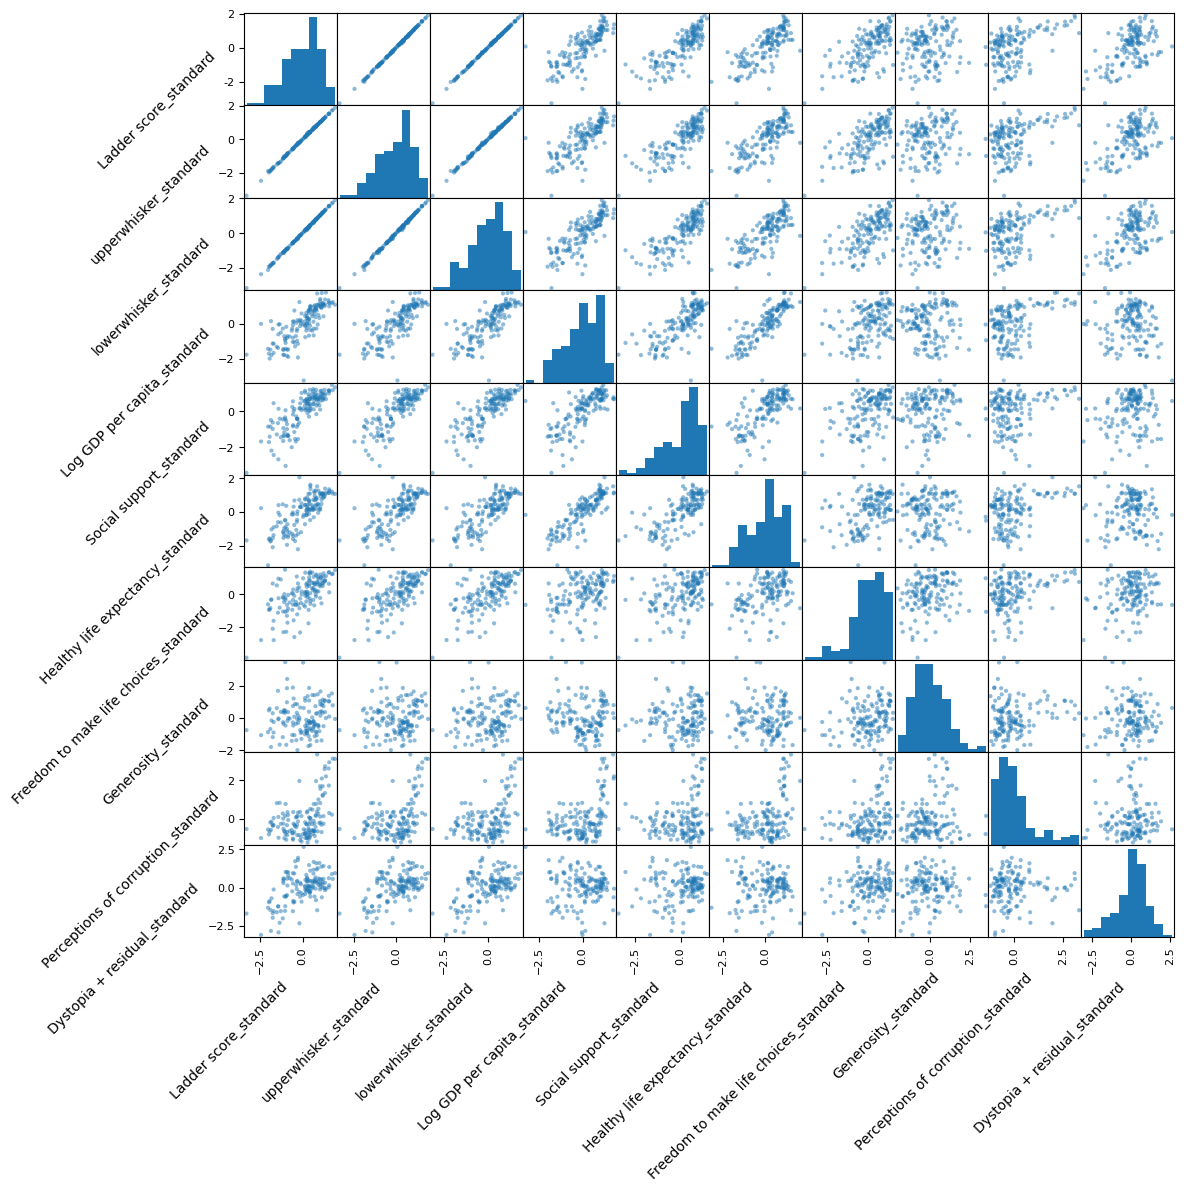

In [16]:
stand_cols = df_scaled.filter(like="_standard").columns
scatterplot_stand = pd.plotting.scatter_matrix(df_scaled[stand_cols], figsize=(12,12))
for ax in scatterplot_stand.ravel():
  ax.xaxis.label.set_rotation(45)
  ax.yaxis.label.set_rotation(45)

  ax.xaxis.label.set_ha('right')
  ax.yaxis.label.set_ha('right')
plt.show()

Figure 3: The same as Figures 1 and 2, but using standardized scaling. The shape is still maintained, however the data is now centered at zero so you can see the spread of the data.

Task 5: Using KMeans clustering, cluster the scaled numerical features (choose either scaling) that are used to calculate the score: 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual' into 3 clusters

In [17]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [18]:
clustering_columns = ["Social support", "Healthy life expectancy", "Freedom to make life choices", "Perceptions of corruption", "Generosity", "Dystopia + residual"]
scaled_columns  = [f"{col}_standard" for col in clustering_columns]
X = df_scaled[scaled_columns]
X = X.dropna() # was getting NaNs... dropping some countries
df_scaled = df_scaled.loc[X.index]
kmeans = KMeans(n_clusters=3, random_state=67, n_init=10)
df_scaled['cluster'] = kmeans.fit_predict(X)

Asked ChatGPT to make a visualization for this cluster:

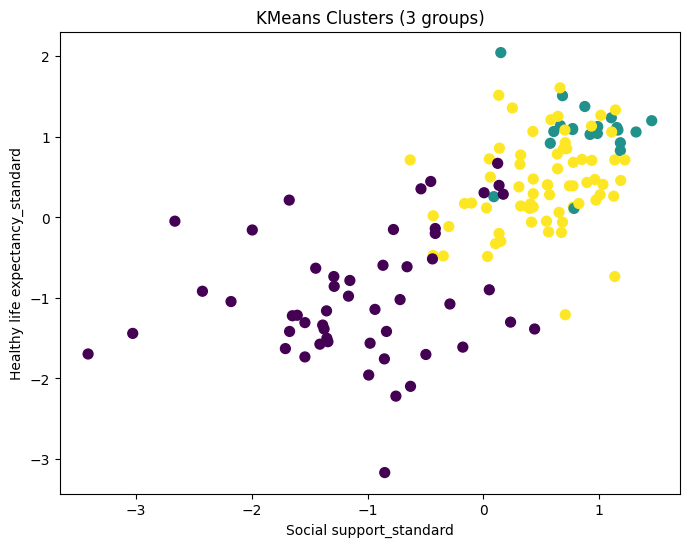

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(
    X.iloc[:, 0], X.iloc[:, 1],
    c=df_scaled['cluster'], cmap='viridis', s=50
)
plt.xlabel(scaled_columns[0])
plt.ylabel(scaled_columns[1])
plt.title("KMeans Clusters (3 groups)")
plt.show()

Figure 4: KMeans clustering of the numerical features using standardized scaling. There are 3 clusters containing Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'.

Task 6: Make a scatter plot with the cluster (0, 1, or 2) on the X axis, and the Happiness score with its errorbar on the Y axis and, as usual, comment on the figure your what, how, wow

I asked chatgpt if i can take the upper - lower whiskers to get the standard error, it told me that since the World Happiness report uses 95% confidence bounds, use the formula below

In [20]:
df_scaled['Ladder_score_SE'] = (df_scaled['upperwhisker'] - df_scaled['lowerwhisker']) / (2 * 1.96)


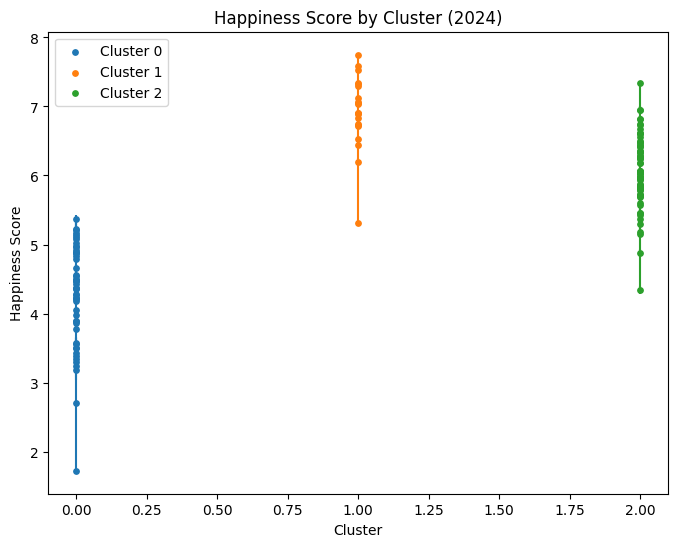

In [21]:
plt.figure(figsize=(8,6))
for cluster_label in sorted(df_scaled['cluster'].unique()):
  cluster_data = df_scaled[df_scaled['cluster'] == cluster_label]
  plt.scatter(cluster_data['cluster'], cluster_data['Ladder score'], label=f'Cluster {cluster_label}', s=15)
  plt.errorbar(cluster_data['cluster'], cluster_data['Ladder score'], cluster_data['Ladder_score_SE'])
plt.xlabel('Cluster')
plt.ylabel('Happiness Score')
plt.title('Happiness Score by Cluster (2024)')
plt.legend()

Figure 5: Scatter plot with errorbars of happiness score for each country. Each cluster was generated by KMeans clustering sorting countries into different clusters. Different features such as 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual' were considered in evaluating the happiness score. The errors were calculated using the upper and lower whiskers taken from the original dataset. Countries in cluster 1 seem to have the best overall happiness, followed by cluster 2 and lastly cluster 0. However there is some noticeable overlap between some clusters, as some countries in cluster 0 are happier than some countries in clusters 1 and 2, and cluster 2 isn't too far off of cluster 1 in terms of happiness. KMeans clustering did not do a great job clustering these countries by happiness.

Task 7: extra credit for 461, required for 661: repeat for 2, 3, 4, 5 , 6, 7 and make a plot of KMeans intracluster variance vs the number of clusters (respectively Y and X) and discuss if this plots allows for a robust selection of the correct number of clusters code that does clustering and inertia elbow plots can be foung here https://colab.research.google.com/gist/fedhere/7e0d43240380731b6b44a5549f45dc91/kmeans_interactive_elbowmethod.ipynb

In [22]:
num_clusters = range(2,8)
inertia_vals = []
for n in num_clusters:
  kmeans = KMeans(n_clusters=n, random_state=67, n_init=10)
  kmeans.fit(X)
  inertia_vals.append(kmeans.inertia_)

Asked ChatGPT to make side by side plots of all the different number of clusters:

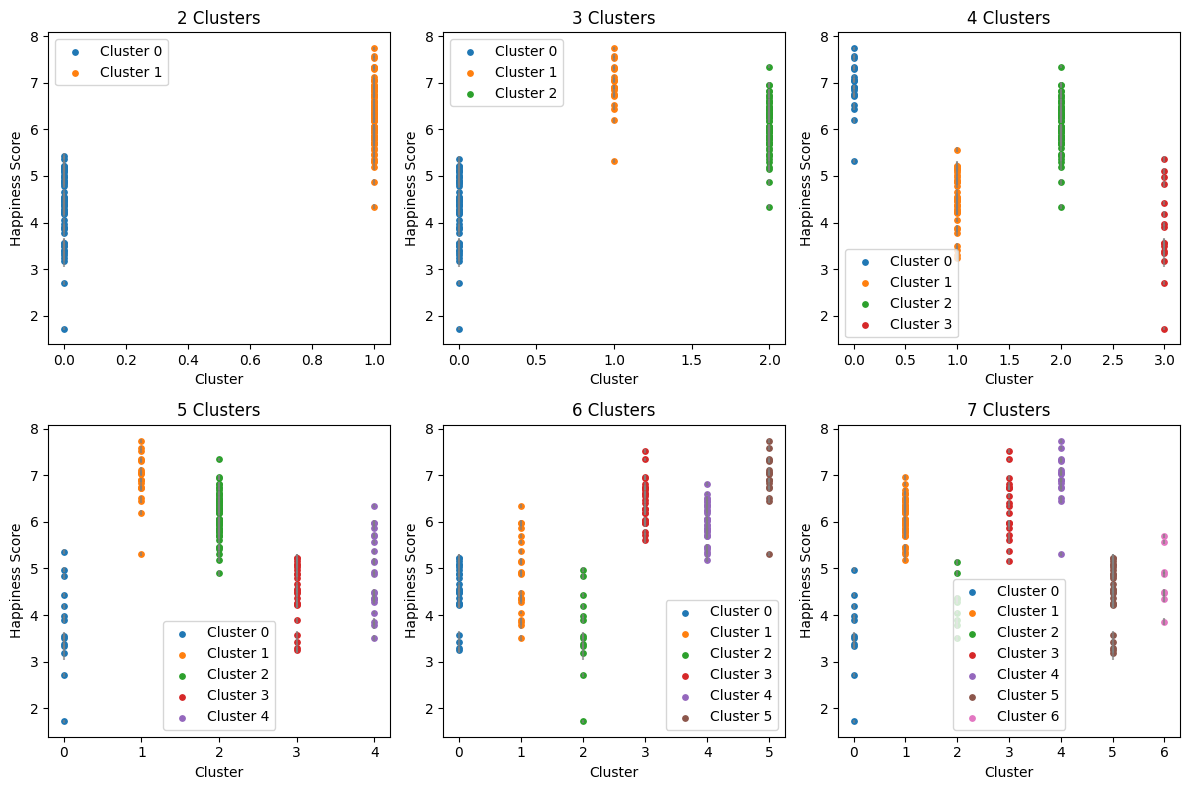

In [23]:
num_clusters = range(2, 8)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns
axes = axes.flatten()  # flatten to easily index

for i, n in enumerate(num_clusters):
    kmeans = KMeans(n_clusters=n, random_state=67, n_init=10)
    df_scaled[f'cluster_{n}'] = kmeans.fit_predict(X)

    ax = axes[i]
    for cluster_label in sorted(df_scaled[f'cluster_{n}'].unique()):
        cluster_data = df_scaled[df_scaled[f'cluster_{n}'] == cluster_label]
        ax.scatter([cluster_label]*len(cluster_data), cluster_data['Ladder score'],
                   label=f'Cluster {cluster_label}', s=15)
        ax.errorbar([cluster_label]*len(cluster_data), cluster_data['Ladder score'],
                    yerr=cluster_data['Ladder_score_SE'], fmt='none', ecolor='gray', alpha=0.7)

    ax.set_title(f'{n} Clusters')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Happiness Score')
    ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

Figure 6: Side by side plots of similar plots to Figure 5, except each plot uses 1 more cluster than the next, nice to visualize what is actually happening as we get more and more clusters. The intracluster variance plot below will help us determine if we can find the best amount of clusters to use for this dataset. It appears from these plots that the more clusters we add, the less meaningful the clusters actually become, as many clusters start to overlap, showing that KMeans begins to fail.

Text(0, 0.5, 'Inertia (intracluster variance)')

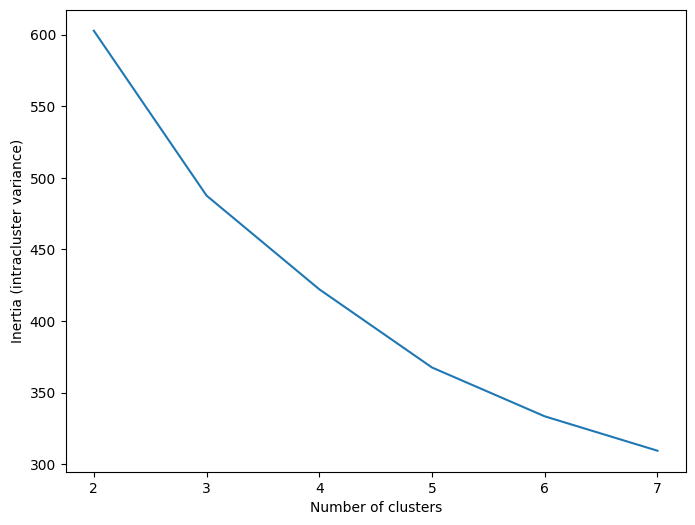

In [24]:
plt.figure(figsize=(8,6))
plt.plot(num_clusters, inertia_vals)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia (intracluster variance)")


Figure 7: Intracluster variance plot for using a varying amount of clusters (2-7). There is a very slow descent, and no noticeable sudden rate of change, meaning that the plot shows that we cannot get a robust selection of the correct number of clusters. KMeans does not seem to be very useful for this dataset, but that isn't to say KMeans is never useful, as there are other datasets that KMeans clustering would be ideal.